In [34]:
import pandas as pd
pd.set_option('display.max_columns', 500)
import os
import glob

## Filtered Data

In [21]:
cd ..

D:\New folder (2)


In [23]:
cd "Filtered Data"

D:\New folder (2)\Filtered Data


In [27]:
data_files = os.listdir()
data_files

['combined files for videos comments info batch 1.csv',
 'combined files for videos comments info batch 2.csv',
 'combined files for videos comments info batch 3.csv',
 'combined files for videos comments info batch 4.csv']

### Batch 1

In [37]:
df1 = pd.read_csv(data_files[0], low_memory=False)

In [38]:
df1.head(1)

,Unnamed: 0,kind,etag,id,snippet.videoId,snippet.topLevelComment.kind,snippet.topLevelComment.etag,snippet.topLevelComment.id,snippet.topLevelComment.snippet.videoId,snippet.topLevelComment.snippet.textDisplay,snippet.topLevelComment.snippet.textOriginal,snippet.topLevelComment.snippet.authorDisplayName,snippet.topLevelComment.snippet.authorProfileImageUrl,snippet.topLevelComment.snippet.authorChannelUrl,snippet.topLevelComment.snippet.authorChannelId.value,snippet.topLevelComment.snippet.canRate,snippet.topLevelComment.snippet.viewerRating,snippet.topLevelComment.snippet.likeCount,snippet.topLevelComment.snippet.publishedAt,snippet.topLevelComment.snippet.updatedAt,snippet.canReply,snippet.totalReplyCount,snippet.isPublic,replies.comments,snippet.topLevelComment.snippet.moderationStatus
0,0.0,youtube#commentThread,HWRVF49a2ObDyvftwuVdJKNhyD8,UgyWYCQS7evmvfmJS-N4AaABAg,14SUI93R_k8,youtube#comment,Iovx9zUM7fOXxqPCM-3iKToEaKw,UgyWYCQS7evmvfmJS-N4AaABAg,14SUI93R_k8,Are you going to see Aquaman 2?,Are you going to see Aquaman 2?,InformOverload,https://yt3.ggpht.com/TwgNy0VFBwUkPhlqVwmDwZoe...,http://www.youtube.com/channel/UC-NINtNMPM75ea...,UC-NINtNMPM75eaqh07RCy_Q,True,none,94.0,2021-03-19T17:03:31Z,2021-03-19T17:03:31Z,True,213.0,True,"[{'kind': 'youtube#comment', 'etag': 'XxrLRzbE...",NaN


In [39]:
df1.shape

(639105, 25)

In [41]:
def object_dtype(df):
    """
    printing the real data type of the object
    """
    
    if list(df.select_dtypes(include=['object']).columns) != [] :
    
        for column in df.select_dtypes(include=['object']).columns:

            print(column,type(df[column][0]))
    else:
        print('No complex data types :)')

In [42]:
object_dtype(df1)

kind <class 'str'>
etag <class 'str'>
id <class 'str'>
snippet.videoId <class 'str'>
snippet.topLevelComment.kind <class 'str'>
snippet.topLevelComment.etag <class 'str'>
snippet.topLevelComment.id <class 'str'>
snippet.topLevelComment.snippet.videoId <class 'str'>
snippet.topLevelComment.snippet.textDisplay <class 'str'>
snippet.topLevelComment.snippet.textOriginal <class 'str'>
snippet.topLevelComment.snippet.authorDisplayName <class 'str'>
snippet.topLevelComment.snippet.authorProfileImageUrl <class 'str'>
snippet.topLevelComment.snippet.authorChannelUrl <class 'str'>
snippet.topLevelComment.snippet.authorChannelId.value <class 'str'>
snippet.topLevelComment.snippet.viewerRating <class 'str'>
snippet.topLevelComment.snippet.publishedAt <class 'str'>
snippet.topLevelComment.snippet.updatedAt <class 'str'>
replies.comments <class 'str'>
snippet.topLevelComment.snippet.moderationStatus <class 'float'>


In [44]:
df1.kind.value_counts()

youtube#commentThread    639105
Name: kind, dtype: int64

In [45]:
extraneous_columns = []

In [46]:
extraneous_columns.append("kind")

In [54]:
sum(df1["etag"].duplicated())

0

In [56]:
sum(df1["id"].duplicated())

0

In [59]:
df1["snippet.videoId"].value_counts()

uretrfMA-Io    120500
dBi3y4w3oAY     11890
h-wpBkiMKd0     10776
hQFFm_X2lps     10556
Cg9SvQSMnoE     10446
                ...  
AX0chTRMBOw         1
ExrLx9Mnn-U         1
aWU10Vms11k         1
WpnC0BaNKRs         1
4mbv0fcpcFo         1
Name: snippet.videoId, Length: 1343, dtype: int64

In [60]:
df1["snippet.topLevelComment.kind"].value_counts()

youtube#comment    639105
Name: snippet.topLevelComment.kind, dtype: int64

In [61]:
extraneous_columns.append("snippet.topLevelComment.kind")

In [63]:
df1["snippet.topLevelComment.snippet.textDisplay"].value_counts()

“They won’t believe you, because you are a man”\r<br>\r<br>She is NOT a victim.                                                                                                                                                            6860
“They won’t believe you, because you are a man”<br><br>She is NOT a victim.                                                                                                                                                                6398
&quot;They won&#39;t believe you, because you are a man&quot;<br><br>She is NOT a victim.                                                                                                                                                  3605
“They won’t believe you, because you are a man”<br><br>She is NOT a victim                                                                                                                                                                 2033
&quot;They won&#39;t believe you, becaus

In [64]:
df1["snippet.topLevelComment.snippet.textOriginal"].value_counts()

“They won’t believe you, because you are a man”\r\n\r\nShe is NOT a victim.                                                                                                                                                                                                                                                                                                                                                 6860
“They won’t believe you, because you are a man”\n\nShe is NOT a victim.                                                                                                                                                                                                                                                                                                                                                     6398
"They won't believe you, because you are a man"\n\nShe is NOT a victim.                                                                                               

In [65]:
df1["snippet.topLevelComment.snippet.authorDisplayName"].value_counts()

Lorri Holder      562
Lindsey Depp      398
PureSparkles22    275
Jake Chapman      238
Carla Castillo    234
                 ... 
JN DC               1
Margaux Darras      1
Garrett Vinson      1
Bethany Beck        1
Joe !               1
Name: snippet.topLevelComment.snippet.authorDisplayName, Length: 390509, dtype: int64

In [67]:
df1["snippet.topLevelComment.snippet.authorProfileImageUrl"].value_counts()

https://yt3.ggpht.com/ytc/AKedOLQLZvuJlMKbx1eDtnkyoBRTnHehdocUX4ai3g=s48-c-k-c0x00ffffff-no-rj                                562
https://yt3.ggpht.com/ytc/AKedOLRRkB8Q0m_9v0I-5m16IZpB_kCs2i37vGyo1edhwg=s48-c-k-c0x00ffffff-no-rj                            275
https://yt3.ggpht.com/ytc/AKedOLSz2BwxzV7YcjbhCtff4NyGZrvzB732Rp9ltw=s48-c-k-c0x00ffffff-no-rj                                264
https://yt3.ggpht.com/ytc/AKedOLSwoxUrCOAFq7i5xNSQtjuEf6gCVT0GIIlkj6FZsA=s48-c-k-c0x00ffffff-no-rj                            238
https://yt3.ggpht.com/ytc/AKedOLSNkFwe5PQo1VA2p-eSqSOR94APu6D2TYpGZQ=s48-c-k-c0x00ffffff-no-rj                                234
                                                                                                                             ... 
https://yt3.ggpht.com/RjZK1jZqapMIKFxbgu9D-tY5-oO9n4UXrgZSrJtQOIXJ6_C0EyK4ta0ddWG81iMiqjHlTRxCTQ=s48-c-k-c0x00ffffff-no-rj      1
https://yt3.ggpht.com/ytc/AKedOLSTHxtUYJgUJ9p1V07GtNwRBeP3hxHJIqM2Iw=s48-c-k-c0x00ffffff-n

In [68]:
extraneous_columns.append("snippet.topLevelComment.snippet.authorProfileImageUrl")

In [69]:
df1["snippet.topLevelComment.snippet.authorChannelUrl"].value_counts()

http://www.youtube.com/channel/UCkUPWp6pfAWrY8UqAukm-tQ    562
http://www.youtube.com/channel/UCr2vrWVP_8vleq3bnBizuzg    275
http://www.youtube.com/channel/UCzeIlZiqg2FEVtpqR-R6WCw    264
http://www.youtube.com/channel/UC8TfvTdn4nAKPMuhw7-BGQQ    238
http://www.youtube.com/channel/UCp9u3DC375IPgZfs2PZ94BA    234
                                                          ... 
http://www.youtube.com/channel/UCT1njnUQ5atgmyrxuUrwhLg      1
http://www.youtube.com/channel/UCS3gXvlDZ98NjLmFE5hulFg      1
http://www.youtube.com/channel/UCn-8ZMZTxZFmFMGCJQTcUzw      1
http://www.youtube.com/channel/UC5W9HKAnh_0F8bD3vZF08Qw      1
http://www.youtube.com/channel/UCD5szsDjGORCZa_sKVv6aEg      1
Name: snippet.topLevelComment.snippet.authorChannelUrl, Length: 415591, dtype: int64

In [70]:
df1["snippet.topLevelComment.snippet.authorChannelId.value"].value_counts()

UCkUPWp6pfAWrY8UqAukm-tQ    562
UCr2vrWVP_8vleq3bnBizuzg    275
UCzeIlZiqg2FEVtpqR-R6WCw    264
UC8TfvTdn4nAKPMuhw7-BGQQ    238
UCp9u3DC375IPgZfs2PZ94BA    234
                           ... 
UCtfw9EE1mu-e4T88rt72oYw      1
UCAK5AplO8vhGbdKp8R09CVg      1
UCmaK0v6RFcbZYo95U_UjBeQ      1
UCn8xHw_wWC1wBQq0MKt3UvQ      1
UCc8AoXggNjwYkIUkuXu-TPg      1
Name: snippet.topLevelComment.snippet.authorChannelId.value, Length: 415591, dtype: int64

In [71]:
df1["snippet.topLevelComment.snippet.viewerRating"].value_counts()

none    639105
Name: snippet.topLevelComment.snippet.viewerRating, dtype: int64

In [72]:
extraneous_columns.append("snippet.topLevelComment.snippet.viewerRating")

In [73]:
df1["snippet.topLevelComment.snippet.publishedAt"].value_counts()

2021-05-27T21:15:44Z    6
2020-11-15T20:01:45Z    6
2021-05-27T21:16:06Z    6
2020-11-15T20:01:27Z    5
2020-12-27T15:08:29Z    5
                       ..
2020-08-19T15:13:20Z    1
2020-10-18T07:07:04Z    1
2020-11-19T07:47:27Z    1
2021-07-02T18:38:55Z    1
2020-02-05T17:59:17Z    1
Name: snippet.topLevelComment.snippet.publishedAt, Length: 622990, dtype: int64

In [74]:
df1["snippet.topLevelComment.snippet.updatedAt"].value_counts()

2021-05-27T21:15:44Z    6
2021-05-27T21:16:06Z    6
2021-05-27T21:15:59Z    6
2021-05-27T21:16:34Z    5
2020-12-23T22:23:42Z    5
                       ..
2020-11-18T16:43:45Z    1
2020-06-26T12:03:22Z    1
2021-02-24T18:15:54Z    1
2021-06-03T08:31:15Z    1
2020-02-05T17:59:17Z    1
Name: snippet.topLevelComment.snippet.updatedAt, Length: 622984, dtype: int64

In [75]:
df1["replies.comments"].value_counts()

[{'kind': 'youtube#comment', 'etag': 'LFfNEreB554ZQXS8Yyy5kAKMazY', 'id': 'UgyqQc7xu6mQYt_bM1l4AaABAg.9OIku51d72S9OIla-W8GHv', 'snippet': {'videoId': 'RbtcV9hfgnI', 'textDisplay': 'Maybe 😂 but I like it! Thanks so much 😊', 'textOriginal': 'Maybe 😂 but I like it! Thanks so much 😊', 'parentId': 'UgyqQc7xu6mQYt_bM1l4AaABAg', 'authorDisplayName': 'Stevie J Raw', 'authorProfileImageUrl': 'https://yt3.ggpht.com/qJjsmP-wrWNVSmXWeGJV6TPA0Jm_v6UTql6pWYFWx5iYCoT3Mvvk8IgcN0yJznhBKbbLA3SbkJ8=s48-c-k-c0x00ffffff-no-rj', 'authorChannelUrl': 'http://www.youtube.com/channel/UCAk03rcNVtLK1_LlgRTOh2w', 'authorChannelId': {'value': 'UCAk03rcNVtLK1_LlgRTOh2w'}, 'canRate': True, 'viewerRating': 'none', 'likeCount': 2, 'publishedAt': '2021-06-07T20:22:13Z', 'updatedAt': '2021-06-07T20:22:13Z'}}]                                                                                                                                                                                                                        

In [76]:
df1["snippet.topLevelComment.snippet.moderationStatus"].value_counts()

likelySpam    386
Name: snippet.topLevelComment.snippet.moderationStatus, dtype: int64

### Batch 2

In [77]:
df2 = pd.read_csv(data_files[1], low_memory=False)

In [78]:
df2.head(1)

,kind,etag,id,snippet.videoId,snippet.topLevelComment.kind,snippet.topLevelComment.etag,snippet.topLevelComment.id,snippet.topLevelComment.snippet.videoId,snippet.topLevelComment.snippet.textDisplay,snippet.topLevelComment.snippet.textOriginal,snippet.topLevelComment.snippet.authorDisplayName,snippet.topLevelComment.snippet.authorProfileImageUrl,snippet.topLevelComment.snippet.authorChannelUrl,snippet.topLevelComment.snippet.authorChannelId.value,snippet.topLevelComment.snippet.canRate,snippet.topLevelComment.snippet.viewerRating,snippet.topLevelComment.snippet.likeCount,snippet.topLevelComment.snippet.publishedAt,snippet.topLevelComment.snippet.updatedAt,snippet.canReply,snippet.totalReplyCount,snippet.isPublic,replies.comments,snippet.topLevelComment.snippet.moderationStatus
0,youtube#commentThread,Zg3vV1PvdZaitb5jFSaqo7D04G8,UgxdPgySMLYnRCnAwjR4AaABAg,STnWZHQnvZU,youtube#comment,auA-l3zq-2RLhbmVceQp41ORHvo,UgxdPgySMLYnRCnAwjR4AaABAg,STnWZHQnvZU,Gold digging liar.,Gold digging liar.,Elvira Feher,https://yt3.ggpht.com/ytc/AKedOLQWXP4ooCbF_yc6...,http://www.youtube.com/channel/UCTLDVENrA2L8Mi...,UCTLDVENrA2L8MiX6JhU1D0A,True,none,0.0,2021-11-03T20:29:13Z,2021-11-03T20:29:13Z,True,0.0,True,NaN,NaN


In [79]:
df2.shape

(650378, 24)

In [83]:
set(df1.columns) - set(df2.columns) 

{'Unnamed: 0'}

### Batch 3

In [84]:
df3 = pd.read_csv(data_files[2], low_memory=False)

In [85]:
df3.head(1)

,kind,etag,id,snippet.videoId,snippet.topLevelComment.kind,snippet.topLevelComment.etag,snippet.topLevelComment.id,snippet.topLevelComment.snippet.videoId,snippet.topLevelComment.snippet.textDisplay,snippet.topLevelComment.snippet.textOriginal,snippet.topLevelComment.snippet.authorDisplayName,snippet.topLevelComment.snippet.authorProfileImageUrl,snippet.topLevelComment.snippet.authorChannelUrl,snippet.topLevelComment.snippet.authorChannelId.value,snippet.topLevelComment.snippet.canRate,snippet.topLevelComment.snippet.viewerRating,snippet.topLevelComment.snippet.likeCount,snippet.topLevelComment.snippet.publishedAt,snippet.topLevelComment.snippet.updatedAt,snippet.canReply,snippet.totalReplyCount,snippet.isPublic,replies.comments,snippet.topLevelComment.snippet.moderationStatus
0,youtube#commentThread,XqJaFV9rWyfZXsWDqU9-3T1jWew,UgzFjLUuRA2XKG5pYYR4AaABAg,rG7bQVZCmis,youtube#comment,blJrRAekatD8osQyCcWHjs-giUc,UgzFjLUuRA2XKG5pYYR4AaABAg,rG7bQVZCmis,Justice for Johnny,Justice for Johnny,Roxy Arce,https://yt3.ggpht.com/ytc/AKedOLTRcszq7dGPo26N...,http://www.youtube.com/channel/UCtBxs_t0euKYK7...,UCtBxs_t0euKYK7cqAfP3PMA,True,none,1.0,2021-09-23T03:52:37Z,2021-09-23T03:52:37Z,True,0.0,True,NaN,NaN


In [79]:
df3.shape

(650378, 24)

In [83]:
set(df1.columns) - set(df3.columns) 

{'Unnamed: 0'}

### Batch 4

In [86]:
df4 = pd.read_csv(data_files[3], low_memory=False)

In [87]:
df4.head(1)

,kind,etag,id,snippet.videoId,snippet.topLevelComment.kind,snippet.topLevelComment.etag,snippet.topLevelComment.id,snippet.topLevelComment.snippet.videoId,snippet.topLevelComment.snippet.textDisplay,snippet.topLevelComment.snippet.textOriginal,snippet.topLevelComment.snippet.authorDisplayName,snippet.topLevelComment.snippet.authorProfileImageUrl,snippet.topLevelComment.snippet.authorChannelUrl,snippet.topLevelComment.snippet.authorChannelId.value,snippet.topLevelComment.snippet.canRate,snippet.topLevelComment.snippet.viewerRating,snippet.topLevelComment.snippet.likeCount,snippet.topLevelComment.snippet.publishedAt,snippet.topLevelComment.snippet.updatedAt,snippet.canReply,snippet.totalReplyCount,snippet.isPublic,replies.comments,snippet.topLevelComment.snippet.moderationStatus
0,youtube#commentThread,dPFyA7aFpdEO7ZJRwfXWu_jaLFk,UgyjdzaK1uKt1b1HbD14AaABAg,I_r1hbfrloM,youtube#comment,TrCqXouRtoO0bKuu1L2_D2B-aAs,UgyjdzaK1uKt1b1HbD14AaABAg,I_r1hbfrloM,why does he pay I mean. does she got to pay fo...,why does he pay I mean. does she got to pay fo...,Jake Chapman,https://yt3.ggpht.com/ytc/AKedOLSwoxUrCOAFq7i5...,http://www.youtube.com/channel/UC8TfvTdn4nAKPM...,UC8TfvTdn4nAKPMuhw7-BGQQ,True,none,0.0,2021-03-28T01:02:21Z,2021-03-28T01:02:21Z,True,0.0,True,NaN,NaN


In [88]:
df4.shape

(120214, 24)

In [89]:
set(df1.columns) - set(df4.columns) 

{'Unnamed: 0'}

#####  Unnamed column only exists in batch one and the othere 24 columns are mutual among all batches

In [93]:
df1['Unnamed: 0'].value_counts()

0.0         1343
1.0         1268
2.0         1228
3.0         1202
4.0         1178
            ... 
20659.0        1
61551.0        1
116085.0       1
99261.0        1
31801.0        1
Name: Unnamed: 0, Length: 120500, dtype: int64

<AxesSubplot:>

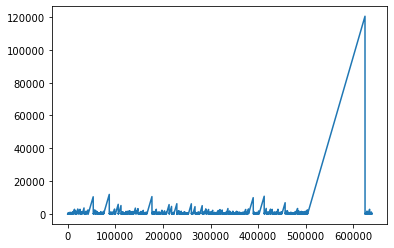

In [94]:
df1['Unnamed: 0'].plot()

In [98]:
extraneous_columns

['kind',
 'snippet.topLevelComment.kind',
 'snippet.topLevelComment.snippet.authorProfileImageUrl',
 'snippet.topLevelComment.snippet.viewerRating']

### those four columnns will be dropped
- kind: is only one unique value **youtube#commentThread**
- snippet.topLevelComment.kind: **youtube#comment**
- 'snippet.topLevelComment.snippet.authorProfileImageUrl' I think no need to use the image.
- nippet.topLevelComment.snippet.viewerRating': has **none** value only

### also unnmaed column of batch one will be dropped

In [99]:
df1.drop(columns=extraneous_columns, inplace=True)
df1.drop(columns="Unnamed: 0", inplace=True)
df2.drop(columns=extraneous_columns, inplace=True)
df3.drop(columns=extraneous_columns, inplace=True)
df4.drop(columns=extraneous_columns, inplace=True)

### merge data in one df

In [101]:
df = pd.concat([df1, df2, df3, df4])

In [102]:
df.head(2)

,etag,id,snippet.videoId,snippet.topLevelComment.etag,snippet.topLevelComment.id,snippet.topLevelComment.snippet.videoId,snippet.topLevelComment.snippet.textDisplay,snippet.topLevelComment.snippet.textOriginal,snippet.topLevelComment.snippet.authorDisplayName,snippet.topLevelComment.snippet.authorChannelUrl,snippet.topLevelComment.snippet.authorChannelId.value,snippet.topLevelComment.snippet.canRate,snippet.topLevelComment.snippet.likeCount,snippet.topLevelComment.snippet.publishedAt,snippet.topLevelComment.snippet.updatedAt,snippet.canReply,snippet.totalReplyCount,snippet.isPublic,replies.comments,snippet.topLevelComment.snippet.moderationStatus
0,HWRVF49a2ObDyvftwuVdJKNhyD8,UgyWYCQS7evmvfmJS-N4AaABAg,14SUI93R_k8,Iovx9zUM7fOXxqPCM-3iKToEaKw,UgyWYCQS7evmvfmJS-N4AaABAg,14SUI93R_k8,Are you going to see Aquaman 2?,Are you going to see Aquaman 2?,InformOverload,http://www.youtube.com/channel/UC-NINtNMPM75ea...,UC-NINtNMPM75eaqh07RCy_Q,True,94.0,2021-03-19T17:03:31Z,2021-03-19T17:03:31Z,True,213.0,True,"[{'kind': 'youtube#comment', 'etag': 'XxrLRzbE...",NaN
1,PrKH0KyXiSAQLB1ZX7qNOX9prZ0,UgxueJBxNOJkXUtDLu94AaABAg,14SUI93R_k8,iD1T4DCU0WUOJm-FtBKu0YvWNm0,UgxueJBxNOJkXUtDLu94AaABAg,14SUI93R_k8,"Guys, quit getting clickbaited. There isn&#39;...","Guys, quit getting clickbaited. There isn't a ...",Twoswordsdrizzt,http://www.youtube.com/channel/UCjpOdSdi4PkbwR...,UCjpOdSdi4PkbwRU4qB8fz0w,True,0.0,2021-08-06T20:57:49Z,2021-08-06T20:57:49Z,True,0.0,True,NaN,NaN


In [103]:
df.shape

(1702095, 20)

In [104]:
df.tail(5)

,etag,id,snippet.videoId,snippet.topLevelComment.etag,snippet.topLevelComment.id,snippet.topLevelComment.snippet.videoId,snippet.topLevelComment.snippet.textDisplay,snippet.topLevelComment.snippet.textOriginal,snippet.topLevelComment.snippet.authorDisplayName,snippet.topLevelComment.snippet.authorChannelUrl,snippet.topLevelComment.snippet.authorChannelId.value,snippet.topLevelComment.snippet.canRate,snippet.topLevelComment.snippet.likeCount,snippet.topLevelComment.snippet.publishedAt,snippet.topLevelComment.snippet.updatedAt,snippet.canReply,snippet.totalReplyCount,snippet.isPublic,replies.comments,snippet.topLevelComment.snippet.moderationStatus
120209,t6lrj25p8XjsLMcDa6DUrYPLLSE,UgyGX91uCDxaEGRR5Ft4AaABAg,Wsn4aXVptWU,SPwH5h0Km4q-iC0fg4T-DK0914o,UgyGX91uCDxaEGRR5Ft4AaABAg,Wsn4aXVptWU,"Nice, super entertaining 😄👍. We need more of t...","Nice, super entertaining 😄👍. We need more of t...",Haz Nora,http://www.youtube.com/channel/UCRg3KZifWUnzqu...,UCRg3KZifWUnzqupMkhaY7jA,True,1.0,2020-12-16T14:55:58Z,2020-12-16T14:55:58Z,True,0.0,True,NaN,NaN
120210,w04aSmsu1ZK9gVIECkopdrLWm1k,UgwXhhgVFmrn3X9gxeZ4AaABAg,Wsn4aXVptWU,My935IQnwjOQe67-1QADASghcWU,UgwXhhgVFmrn3X9gxeZ4AaABAg,Wsn4aXVptWU,Bravo!!!! Encore!!!,Bravo!!!! Encore!!!,3 Sisters& Wine,http://www.youtube.com/channel/UCKR14HJmoUDh73...,UCKR14HJmoUDh73VlZY0EHEA,True,2.0,2020-12-14T15:16:56Z,2020-12-14T15:16:56Z,True,0.0,True,NaN,NaN
120211,49BUlSNPtfH7nweyhUxAf8b_j-E,UgyJHJ-yrDU8aBOrch94AaABAg,Wsn4aXVptWU,q-RsOj7fOTdGZnxtX9wCEEUJRzE,UgyJHJ-yrDU8aBOrch94AaABAg,Wsn4aXVptWU,This woman sings better than Heard.,This woman sings better than Heard.,Kia Choong Teo,http://www.youtube.com/channel/UCtFDY41CuxB0v_...,UCtFDY41CuxB0v_M1vcP6bxw,True,2.0,2020-12-14T12:33:18Z,2020-12-14T12:33:18Z,True,0.0,True,NaN,NaN
120212,Djgx-tI8TbgiuAiI8YP6csDZCro,UgxBluFBpap0w3Z1-394AaABAg,Wsn4aXVptWU,ApmfWVz2fdgj77pYH0Iw2eIupmE,UgxBluFBpap0w3Z1-394AaABAg,Wsn4aXVptWU,It was about time for sth like that😂😂,It was about time for sth like that😂😂,Annemarie Sattler,http://www.youtube.com/channel/UCCNRJJ7jcr0NMS...,UCCNRJJ7jcr0NMST7sIzqWvA,True,1.0,2020-12-14T02:36:44Z,2020-12-14T02:44:09Z,True,0.0,True,NaN,NaN
120213,3QejFaK_rNcrlEc_94HP8C8Urq0,UgzgZHG0CRvc_zKHgut4AaABAg,Wsn4aXVptWU,iShSomRtKR4ffGzusCTnC8yFssg,UgzgZHG0CRvc_zKHgut4AaABAg,Wsn4aXVptWU,😂,😂,Crispy Co,http://www.youtube.com/channel/UCrGYhxT7EHyrpc...,UCrGYhxT7EHyrpcyGmgjYOMQ,True,3.0,2020-12-11T05:55:25Z,2020-12-11T05:55:25Z,True,0.0,True,NaN,NaN


In [107]:
df.reset_index(inplace=True)

### save initial merged filtered data

In [108]:
df.to_csv("initial_merged_data.csv", index=False)